In [1]:
from Node.Node import Control_node
from Node.functions import *
import numpy as np
import time
import pylab as pl
from IPython import display
import matplotlib.pyplot as plt

## Two Reference Signals

If agents have distinct reference signals, we see how their behaviors help drive their counter part to behave how they would want them to behave. The red spots indicate x-axis reference signals for each agent, showing the point along the x-axis that the agent would like the other agent to be observed in. Across time the behaviors of each agent are shown to move towards y = 0 to show their progress. Control is exerted only along the x-direction.

Because control is exerted probabilistically, with error dictating the magnitude of control exerted, agents sometimes take longer to align and reach a common state of low error. But it is clear that if one agent is behaving undesirably, the other continues to exert changes in behavior.

In [31]:
# behavioral matrix (maps previous behavior to future behavior commands - how should I behave?)
B1 = np.array([0.2])
B2 = np.array([0.2])

# state/system matrix (maps previous state to future state - how will others behave (give past behaviors)?)
A1 = np.array([1])
A2 = np.array([1])

# reference matrix (how do I expect/want others to behave? target values)
R1 = np.array([0.8])
R2 = np.array([0.2])

# Initial behavior
behav_1 = np.array([0.5])
behav_2 = np.array([0.5])


# get the state observation (behaviors of others)
def sense(inputs):
    return inputs

# contrast reference with observations (and potentially incorporate predictions from internal model)
def compare(sensory_signal, reference, prediction):
    error = reference - sensory_signal
    return error

# generate a behavior
def control(error, behavioral_model, previous_output):
    output = chaotic_update(previous_output, 0.05, error)
    return output


# adjusts behavioral model to get closer to behavior given 
def control_update(error, behavioral_model, previous_output):
    # LMS algorithm
    learning_rate = 0.0
    #behavioral_model = behavioral_model + learning_rate * error * previous_output
    return behavioral_model

# generate predictions on next state
def imc(system_estimate, previous_state, behavioral_model, previous_output):
    # actual estimate
    state = (system_estimate @ previous_state) + (behavioral_model @ previous_output)
    return state

# adjust system estimate to infer observations given my behavior
def imc_update(inputs, system_estimate, previous_behavior, behavioral_model, previous_state, learning_rate):
    # actual estimate
    curr_system_est = (system_estimate @ previous_state) + (behavioral_model @ previous_behavior)
    error = curr_system_est - inputs
    #learning_rate = 0.01
    system_estimate = system_estimate + learning_rate * error * previous_behavior
    return system_estimate
    





agent1 = Control_node(sensor=sense, comparator=compare, control_update=control_update, controller = control, internal_model=imc, internal_model_update=imc_update, behavioral_model=B1, system_estimate=A1, reference=R1, init_behavior=behav_1)
agent2 = Control_node(sensor=sense, comparator=compare, control_update=control_update,  controller = control, internal_model=imc, internal_model_update=imc_update, behavioral_model=B2, system_estimate=A2, reference=R2, init_behavior=behav_2)


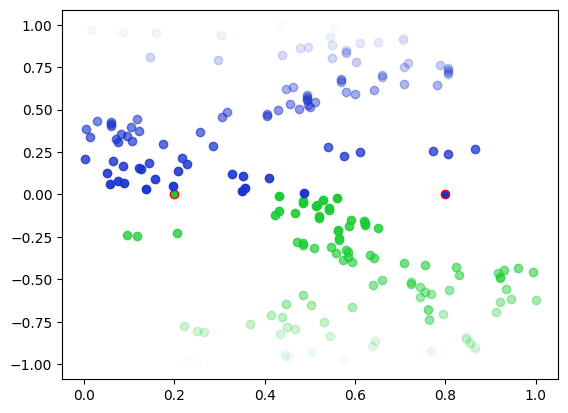

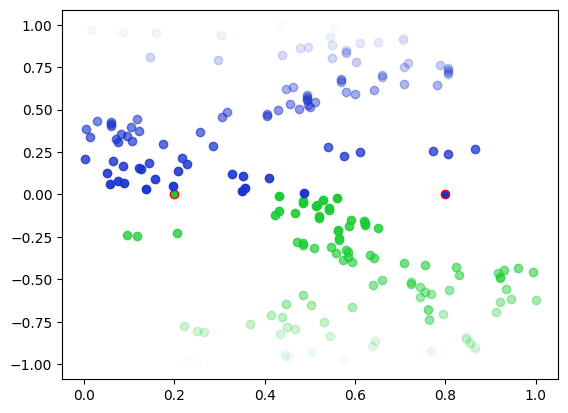

In [32]:
%matplotlib inline
trials = 100
color = (0.1,0.2,0.8,0.1)
agent1_behaviors = []
agent2_behaviors = []
agent1_error = []
agent2_error = []

b1 = behav_1
b2 = behav_2

pl.scatter(R1[0],0, c=(0.1,0.2,0.8), edgecolors='red')
pl.scatter(R2[0],0, c=(0.1,0.8,0.2,), edgecolors='red')
for t in range(trials):
    b1_temp = agent1.go(b2)   
    b2_temp = agent2.go(b1)

    agent1_behaviors.append(agent1.get_output())
    agent2_behaviors.append(agent2.get_output())

    agent1_error.append(np.absolute(agent1.get_error()))
    agent2_error.append(np.absolute(agent2.get_error()))
    #agent1_error.append(sum(abs(agent1.get_error())/len(agent1.get_error())))

    b1 = b1_temp
    b2 = b2_temp
    
    color1 = [0.1,0.2,0.8, (t+1)/(trials+1)]
    color2 = [0.1,0.8,0.2, (t+1)/(trials+1)]
    pl.scatter(b1[0],1-(t+1)/(trials+1),c=tuple(color1))
    pl.scatter(b2[0],-1+(t+1)/(trials+1),c=tuple(color2))
    display.clear_output(wait=True)
    display.display(pl.gcf())
    #time.sleep(0.1)

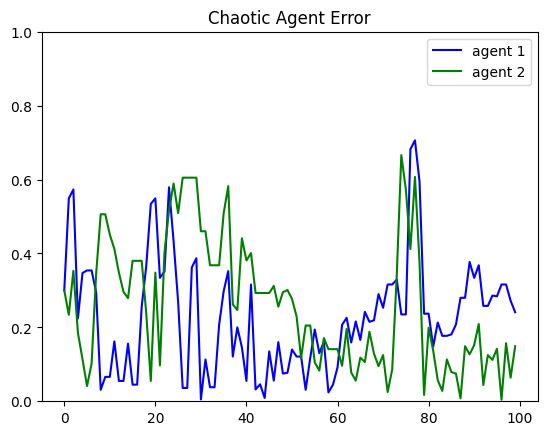

In [33]:
t = [n for n in range(trials)]
plt.plot(t, agent1_error, 'b',label="agent 1")
plt.plot(t, agent2_error, 'g', label="agent 2")
plt.ylim([0, 1])
plt.legend()
plt.title("Chaotic Agent Error")
plt.show()

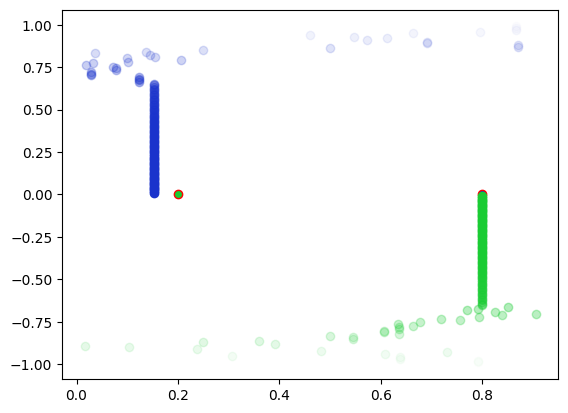

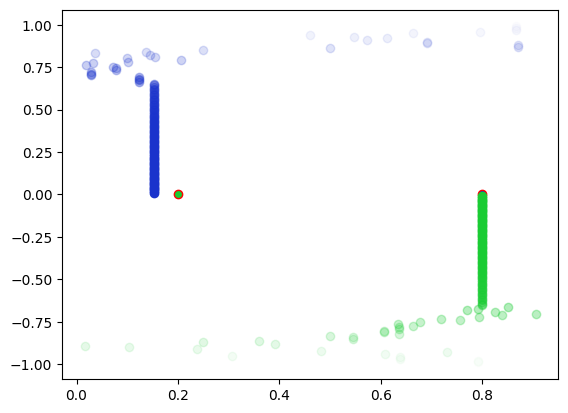

In [49]:
%matplotlib inline
trials = 100
color = (0.1,0.2,0.8,0.1)
agent1_behaviors = []
agent2_behaviors = []
agent1_error = []
agent2_error = []

b1 = behav_1
b2 = behav_2

pl.scatter(R1[0],0, c=(0.1,0.2,0.8), edgecolors='red')
pl.scatter(R2[0],0, c=(0.1,0.8,0.2,), edgecolors='red')
for t in range(trials):
    b1_temp = agent1.go(b2)   
    b2_temp = agent2.go(b1)

    agent1_behaviors.append(agent1.get_output())
    agent2_behaviors.append(agent2.get_output())

    agent1_error.append(np.absolute(agent1.get_error()))
    agent2_error.append(np.absolute(agent2.get_error()))
    #agent1_error.append(sum(abs(agent1.get_error())/len(agent1.get_error())))

    b1 = b1_temp
    b2 = b2_temp
    
    color1 = [0.1,0.2,0.8, (t+1)/(trials+1)]
    color2 = [0.1,0.8,0.2, (t+1)/(trials+1)]
    pl.scatter(b1[0],1-(t+1)/(trials+1),c=tuple(color1))
    pl.scatter(b2[0],-1+(t+1)/(trials+1),c=tuple(color2))
    display.clear_output(wait=True)
    display.display(pl.gcf())
    #time.sleep(0.1)

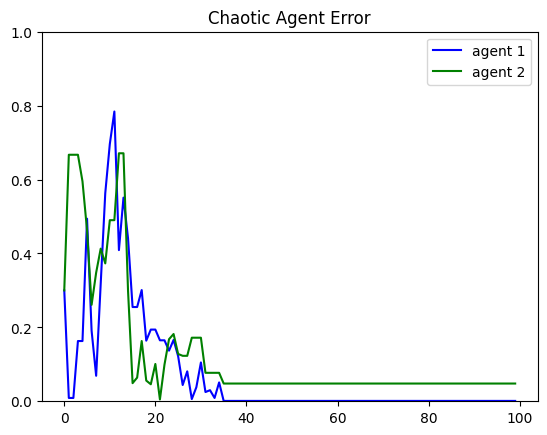

In [50]:
t = [n for n in range(trials)]
plt.plot(t, agent1_error, 'b',label="agent 1")
plt.plot(t, agent2_error, 'g', label="agent 2")
plt.ylim([0, 1])
plt.legend()
plt.title("Chaotic Agent Error")
plt.show()